<a href="https://colab.research.google.com/github/shantanu2383/SIGNAL-CONSTRUCTION-ST-REVERSAL-LT-REVERSAL/blob/main/SS_SIGNAL_CONSTRUCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)


import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

Mounted at /content/gdrive


# Building a signal from scratch-SS

A signal in the context of trading is a signal that indicates whether to buy or sell a stock, or to hold it. Signals are generated by analyzing market data, such as prices, volumes, and other technical indicators.

A short-term reversal signal is generated when a stock's price is expected to reverse its direction in the short-term, for example, in the next few days or weeks. A long-term reversal signal is generated when a stock's price is expected to reverse its direction in the long-term, for example, in the next few months or years.

In [ ]:
filepath="/content/gdrive/MyDrive/portfolio_construction/"


In [ ]:
## import daily stock returns and winsorise
DailyStockReturns = pd.read_csv(filepath + "DailyStockReturns2022.csv")
DailyStockReturns["Date"] = pd.to_datetime(DailyStockReturns["Date"]).dt.date
DailyStockReturns = DailyStockReturns.set_index(["Date", "Ticker"])
print("RAW RETURNS: \n")
print(DailyStockReturns)
print("\nMax Ret = ", DailyStockReturns.max().max())
print("\nMin Ret = ", DailyStockReturns.min().min())
DailyStockReturns = DailyStockReturns.where((DailyStockReturns["Return"] < 0.20), 0.20)
DailyStockReturns = DailyStockReturns.where((DailyStockReturns["Return"] > -0.20), -0.20)
print("\n\nWINSORISED RETURNS: \n")
print(DailyStockReturns)
print("\nMax Ret = ", DailyStockReturns.max().max())
print("\nMin Ret = ", DailyStockReturns.min().min())


RAW RETURNS: 

                     Return
Date       Ticker          
2022-01-03 A      -0.018541
2022-01-04 A      -0.033806
2022-01-05 A      -0.017131
2022-01-06 A       0.003499
2022-01-07 A      -0.026623
...                     ...
2022-12-21 ZYXI    0.014012
2022-12-22 ZYXI   -0.010909
2022-12-23 ZYXI    0.015441
2022-12-27 ZYXI   -0.003621
2022-12-28 ZYXI    0.008721

[2894087 rows x 1 columns]

Max Ret =  inf

Min Ret =  -1.0


WINSORISED RETURNS: 

                     Return
Date       Ticker          
2022-01-03 A      -0.018541
2022-01-04 A      -0.033806
2022-01-05 A      -0.017131
2022-01-06 A       0.003499
2022-01-07 A      -0.026623
...                     ...
2022-12-21 ZYXI    0.014012
2022-12-22 ZYXI   -0.010909
2022-12-23 ZYXI    0.015441
2022-12-27 ZYXI   -0.003621
2022-12-28 ZYXI    0.008721

[2894087 rows x 1 columns]

Max Ret =  0.2

Min Ret =  -0.2


Now we create a mask for stocks >= $20/sh. The basic logic behind this is eventually we will have a matrix with 1's and 0's, where 0's represent stocks we want to drop and 1's stocks we want to keep. By using the mask matrix to multiply, this is equivalent to simply dropping the stocks we want to keep

In [ ]:
## import daily stock prices and create mask for stocks >= $20/sh
DailyStockPrices = pd.read_csv(filepath + "DailyStockPrices2022.csv")
DailyStockPrices["Date"] = pd.to_datetime(DailyStockPrices["Date"]).dt.date
DailyStockPrices = DailyStockPrices.set_index(["Date", "Ticker"])
Mask = DailyStockPrices.copy().groupby(["Date", "Ticker"])["ClosePx"].aggregate("first").unstack()
Mask.sort_values(by="Date", ascending=True, inplace=True)
Mask = Mask.where((Mask >= 20), 0)
Mask = Mask.where((Mask < 20), 1)
print(Mask)
print("\nUniverse size: \n", Mask.sum(axis=1))

In [ ]:
DailyStockReturnsMatrix = DailyStockReturns.copy().groupby(["Date", "Ticker"])["Return"].aggregate("first").unstack()
DailyStockReturnsMatrix = DailyStockReturnsMatrix.mul(Mask)
ShortTermReversal = (-1 * DailyStockReturnsMatrix.copy().shift(1).rolling(5).sum()).fillna(0)
LongTermReversal = (-1 * DailyStockReturnsMatrix.copy().shift(1).rolling(20).sum()).fillna(0)
print("Short-Term Reversal Signals: \n\n", ShortTermReversal)

Short-Term Reversal Signals: 

 Ticker             A        AA  AAA  AAAU  AAC  AACG  AACI  AACIU  AACIW  \
Date                                                                       
2022-01-03  0.000000  0.000000  0.0   0.0  0.0   0.0   0.0    0.0    0.0   
2022-01-04  0.000000  0.000000  0.0   0.0  0.0   0.0   0.0    0.0    0.0   
2022-01-05  0.000000  0.000000  0.0   0.0  0.0   0.0   0.0    0.0    0.0   
2022-01-06  0.000000  0.000000  0.0   0.0  0.0   0.0   0.0    0.0    0.0   
2022-01-07  0.000000  0.000000  0.0   0.0  0.0   0.0   0.0    0.0    0.0   
...              ...       ...  ...   ...  ...   ...   ...    ...    ...   
2022-12-21  0.063004  0.043773  0.0   0.0 -0.0  -0.0  -0.0   -0.0   -0.0   
2022-12-22  0.030326  0.011570  0.0   0.0 -0.0  -0.0  -0.0   -0.0   -0.0   
2022-12-23  0.012006 -0.014709  0.0   0.0 -0.0  -0.0  -0.0   -0.0   -0.0   
2022-12-27  0.000189 -0.035401  0.0   0.0 -0.0  -0.0  -0.0   -0.0   -0.0   
2022-12-28 -0.017696 -0.059697  0.0   0.0 -0.0  -0.0  -0

Before demeaning, the signals may contain bias that could lead to incorrect trading decisions. For example, if the signal for a particular stock is consistently higher than the average signal for all stocks, then traders may be tempted to buy the stock even if the signal is not actually indicating a strong reversal. 

After demeaning, the signal for the particular stock will have been adjusted so that it is equal to the average signal for all stocks. This means that traders can make more informed and accurate trading decisions, as they are no longer being swayed by any bias in the signal.

In [ ]:
p## demean the signals
ShortTermReversal = ShortTermReversal.sub(ShortTermReversal.mean(axis=1), axis=0)
LongTermReversal = LongTermReversal.sub(LongTermReversal.mean(axis=1), axis=0)


In [ ]:
## define helper function to normalise weights (takes a DF with index = dates, columns = stock weights)
def NormaliseWeightsForEachDate(DF):
    Result = pd.DataFrame(columns = ["Date", "Ticker", "Signal"])
    for date in DF.index.tolist():
        SignalsForDate = DF.loc[date].copy()
        SignalsForDate = pd.concat([(SignalsForDate[SignalsForDate > 0] / SignalsForDate[SignalsForDate > 0].sum()), (-1 * SignalsForDate[SignalsForDate < 0] / SignalsForDate[SignalsForDate < 0].sum())]).reset_index()
        SignalsForDate["Date"] = date
        SignalsForDate.columns = ["Ticker", "Signal", "Date"]
        Result = pd.concat([Result, SignalsForDate])
    Result = Result.groupby(["Date", "Ticker"])["Signal"].aggregate("first").unstack().fillna(0)
    Result.sort_values(by="Date", ascending=True, inplace=True)
    return Result


## normalise the signals
ShortTermReversal = NormaliseWeightsForEachDate(ShortTermReversal)  
LongTermReversal = NormaliseWeightsForEachDate(LongTermReversal)  
print("\nShort-Term Reversal Long Weights: \n", ShortTermReversal[ShortTermReversal > 0].sum(axis=1))
print("\nShort-Term Reversal Short Weights: \n", ShortTermReversal[ShortTermReversal < 0].sum(axis=1))
print("\nShort-Term Reversal Net Exposures: \n", ShortTermReversal.sum(axis=1).round(2))



Short-Term Reversal Long Weights: 
 Date
2022-01-10    1.0
2022-01-11    1.0
2022-01-12    1.0
2022-01-13    1.0
2022-01-14    1.0
             ... 
2022-12-21    1.0
2022-12-22    1.0
2022-12-23    1.0
2022-12-27    1.0
2022-12-28    1.0
Length: 244, dtype: float64

Short-Term Reversal Short Weights: 
 Date
2022-01-10   -1.0
2022-01-11   -1.0
2022-01-12   -1.0
2022-01-13   -1.0
2022-01-14   -1.0
             ... 
2022-12-21   -1.0
2022-12-22   -1.0
2022-12-23   -1.0
2022-12-27   -1.0
2022-12-28   -1.0
Length: 244, dtype: float64

Short-Term Reversal Net Exposures: 
 Date
2022-01-10   -0.0
2022-01-11   -0.0
2022-01-12    0.0
2022-01-13    0.0
2022-01-14   -0.0
             ... 
2022-12-21   -0.0
2022-12-22    0.0
2022-12-23    0.0
2022-12-27   -0.0
2022-12-28   -0.0
Length: 244, dtype: float64


In [ ]:
'''Here we are essentially trying to normalise our signals, and ensure
the sum of all the signals for each date is equal to one'''

''' The sum of positive signals is calculated by using the following code:
SignalsForDate[SignalsForDate > 0].sum()
This is summing up all the positive signals.

Then the same process is done for negative signals:
(-1 * SignalsForDate[SignalsForDate < 0] / SignalsForDate[SignalsForDate < 0].sum())
This is selecting all the rows in the dataframe where the signal is less than 0, and summing them up, and dividing by the sum of negative signals.

Then it concatenates the positive and negative signals using the pd.concat() method.
pd.concat([(SignalsForDate[SignalsForDate > 0] / SignalsForDate[SignalsForDate > 0].sum()), (-1 * SignalsForDate[SignalsForDate < 0] / SignalsForDate[SignalsForDate < 0].sum())])'''

' The sum of positive signals is calculated by using the following code:\nSignalsForDate[SignalsForDate > 0].sum()\nThis is summing up all the positive signals.\n\nThen the same process is done for negative signals:\n(-1 * SignalsForDate[SignalsForDate < 0] / SignalsForDate[SignalsForDate < 0].sum())\nThis is selecting all the rows in the dataframe where the signal is less than 0, and summing them up, and dividing by the sum of negative signals.\n\nThen it concatenates the positive and negative signals using the pd.concat() method.\npd.concat([(SignalsForDate[SignalsForDate > 0] / SignalsForDate[SignalsForDate > 0].sum()), (-1 * SignalsForDate[SignalsForDate < 0] / SignalsForDate[SignalsForDate < 0].sum())])'

In [ ]:
## apply the mask and re-normalise for each date
ShortTermReversal = ShortTermReversal.mul(Mask)
LongtTermReversal = LongTermReversal.mul(Mask)
print("\nShort-Term Reversal Long Weights After Mask / Before Normalisation: \n", ShortTermReversal[ShortTermReversal > 0].sum(axis=1))
print("\nShort-Term Reversal Short Weights After Mask / Before Normalisation: \n", ShortTermReversal[ShortTermReversal < 0].sum(axis=1))
print("\nShort-Term Reversal Net Exposures After Mask / Before Normalisation: \n", ShortTermReversal.sum(axis=1).round(2))
ShortTermReversal = NormaliseWeightsForEachDate(ShortTermReversal)  
LongTermReversal = NormaliseWeightsForEachDate(LongTermReversal)  
print("\nShort-Term Reversal Long Weights After Mask / After Normalisation: \n", ShortTermReversal[ShortTermReversal > 0].sum(axis=1))
print("\nShort-Term Reversal Short Weights After Mask / After Normalisation: \n", ShortTermReversal[ShortTermReversal < 0].sum(axis=1))
print("\nShort-Term Reversal Net Exposures After Mask / After Normalisation: \n", ShortTermReversal.sum(axis=1).round(2))



Short-Term Reversal Long Weights After Mask / Before Normalisation: 
 Date
2022-01-03    0.000000
2022-01-04    0.000000
2022-01-05    0.000000
2022-01-06    0.000000
2022-01-07    0.000000
                ...   
2022-12-21    0.990734
2022-12-22    0.970345
2022-12-23    0.977506
2022-12-27    0.921017
2022-12-28    0.642272
Length: 249, dtype: float64

Short-Term Reversal Short Weights After Mask / Before Normalisation: 
 Date
2022-01-03    0.000000
2022-01-04    0.000000
2022-01-05    0.000000
2022-01-06    0.000000
2022-01-07    0.000000
                ...   
2022-12-21   -0.228698
2022-12-22   -0.389584
2022-12-23   -0.568870
2022-12-27   -0.970358
2022-12-28   -0.968589
Length: 249, dtype: float64

Short-Term Reversal Net Exposures After Mask / Before Normalisation: 
 Date
2022-01-03    0.00
2022-01-04    0.00
2022-01-05    0.00
2022-01-06    0.00
2022-01-07    0.00
              ... 
2022-12-21    0.76
2022-12-22    0.58
2022-12-23    0.41
2022-12-27   -0.05
2022-12-28   -0.33

In [ ]:
## define helper function to take the top/bottom "n" tails for each date of a given signal
def Tails(DF, n):
    Result = pd.DataFrame(columns = ["Date", "Ticker", "Signal"]) #create new df 
    for date in DF.index.tolist(): #loop over every date in df
        SignalsForDate = pd.concat([DF.loc[date].nsmallest(n), DF.loc[date].nlargest(n)]).reset_index()
        SignalsForDate["Date"] = date
        SignalsForDate.columns = ["Ticker", "Signal", "Date"]
        Result = pd.concat([Result, SignalsForDate])
    Result = Result.groupby(["Date", "Ticker"])["Signal"].aggregate("first").unstack().fillna(0)
    Result.sort_values(by="Date", ascending=True, inplace=True)
    return Result

This tails function does the following- takes a dataframe (which will be our signals), and creates a new 'results' dataframe. We then loop over every date and extract the top 200 and bottom 200 signals. We then add this to our 'results' dataframe. the end result is effectively a dataframe with the top 200 and bottom 200 signals for any given date

In [ ]:
## keep the top 200 long & 200 short stocks for each signal (for each date)
ShortTermReversal = Tails(ShortTermReversal, 200)
LongTermReversal = Tails(LongTermReversal, 200)
print(ShortTermReversal)
print(LongTermReversal)

## re-normalise
ShortTermReversal = NormaliseWeightsForEachDate(ShortTermReversal)  
LongTermReversal = NormaliseWeightsForEachDate(LongTermReversal)  
print("\nShort-Term Reversal Long Weights: \n", ShortTermReversal[ShortTermReversal > 0].sum(axis=1))
print("\nShort-Term Reversal Short Weights: \n", ShortTermReversal[ShortTermReversal < 0].sum(axis=1))
print("\nShort-Term Reversal Net Exposures: \n", ShortTermReversal.sum(axis=1).round(2))

## export signals for use later
ShortTermReversal.unstack().reset_index().set_index("Date").rename(columns = {0:"ShortTermReversal"}).to_csv(filepath + "ss_ShortTermReversal.csv")
LongTermReversal.unstack().reset_index().set_index("Date").rename(columns = {0:"LongTermReversal"}).to_csv(filepath + "ss_LongTermReversal.csv")



Ticker        A      AA  AAA  AADI  AAIC_P_B  AAIC_P_C  AAIN  AAMC  AAM_P_A  \
Date                                                                          
2022-01-10  0.0  0.0000  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
2022-01-11  0.0  0.0000  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
2022-01-12  0.0 -0.0014  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
2022-01-13  0.0  0.0000  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
2022-01-14  0.0  0.0000  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
...         ...     ...  ...   ...       ...       ...   ...   ...      ...   
2022-12-21  0.0  0.0000  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
2022-12-22  0.0  0.0000  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
2022-12-23  0.0  0.0000  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
2022-12-27  0.0  0.0000  0.0   0.0       0.0       0.0   0.0   0.0      0.0   
2022-12-28  0.0  0.0000  0.0   0.0       0.0       0

So now we calculate the actual returns of our strategy. Remember we have normalised the weights of the signals. therefore by multiplying our weighted signals by the daily returns, this is equivalent to the returns on our portfolio which is weighted by the signals


Daily Signal Returns: 
             ShortTermReversalRet  LongTermReversalRet
Date                                                 
2022-01-03              0.000000             0.000000
2022-01-04              0.000000             0.000000
2022-01-05              0.000000             0.000000
2022-01-06              0.000000             0.000000
2022-01-07              0.000000             0.000000
...                          ...                  ...
2022-12-21              0.028723             0.007542
2022-12-22             -0.027223            -0.017042
2022-12-23             -0.003873             0.013704
2022-12-27             -0.021147            -0.014903
2022-12-28              0.012752             0.000531

[249 rows x 2 columns]


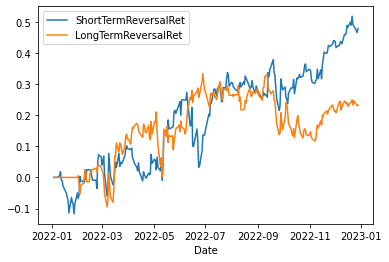

In [ ]:
## compute daily returns for each signal
ShortTermReversalRets = pd.DataFrame(ShortTermReversal.mul(DailyStockReturnsMatrix).sum(axis=1), columns=["ShortTermReversalRet"])
LongTermReversalRets = pd.DataFrame(LongTermReversal.mul(DailyStockReturnsMatrix).sum(axis=1), columns=["LongTermReversalRet"])
SignalRets = ShortTermReversalRets.join(LongTermReversalRets, how='outer')
print("\nDaily Signal Returns: \n", SignalRets)

## plot the signals and examine results
CumSignalRets = np.cumsum(SignalRets).reset_index()
CumSignalRets.plot(x="Date", y=["ShortTermReversalRet", "LongTermReversalRet"])


In [ ]:
## summarise the performance of each signal
Signals = ["ShortTermReversal", "LongTermReversal"]
SummaryStats = pd.DataFrame(columns = ["Sharpe", "AnnRet", "MaxDd"])
for signal in Signals:
    annRet = (252 * SignalRets["{signal}Ret".format(signal=signal)].mean())
    sharpe = (annRet / (np.sqrt(252) * SignalRets["{signal}Ret".format(signal=signal)].std()))
    CumSignalRetsTemp = np.cumsum(SignalRets[["{signal}Ret".format(signal=signal)]])
    CumSignalRetsTemp["CumTotalRetMax"] = CumSignalRetsTemp["{signal}Ret".format(signal=signal)].cummax()
    CumSignalRetsTemp["CurrentDd"] = (CumSignalRetsTemp["{signal}Ret".format(signal=signal)] - CumSignalRetsTemp["CumTotalRetMax"])
    maxDd = CumSignalRetsTemp["CurrentDd"].min()
    SummaryStats.loc[signal] = {"Sharpe":sharpe, "AnnRet":annRet, "MaxDd":maxDd}
print(SummaryStats)

                     Sharpe    AnnRet     MaxDd
ShortTermReversal  1.051816  0.484766 -0.241491
LongTermReversal   0.576757  0.234549 -0.216720



The max drawdown is calculated by finding the maximum cumulative return of the signal over a given period of time, and then subtracting the current cumulative return from the maximum cumulative return. This gives the maximum amount of loss from peak value that the signal has experienced over a given period of time. This means that the higher the max drawdown, the more the signal has declined from its peak value over a given period of time, which indicates that the signal is taking on more risk. 

                     Sharpe    AnnRet     MaxDd
ShortTermReversal  1.051816  0.484766 -0.241491
LongTermReversal   0.576757  0.234549 -0.216720
Avg                0.982803  0.359657 -0.152860


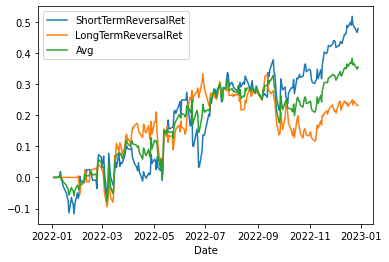

In [ ]:
## combine the signals using simple average, plot and add to SummaryStats
SignalRets["Avg"] = (SignalRets[["ShortTermReversalRet", "LongTermReversalRet"]].mean(axis=1))
CumSignalRets = np.cumsum(SignalRets).reset_index()
CumSignalRets.plot(x="Date", y=["ShortTermReversalRet", "LongTermReversalRet", "Avg"])
annRet = (252 * SignalRets["Avg"].mean())
sharpe = (annRet / (np.sqrt(252) * SignalRets["Avg"].std()))
CumSignalRetsTemp = np.cumsum(SignalRets[["Avg"]])
CumSignalRetsTemp["CumTotalRetMax"] = CumSignalRetsTemp["Avg"].cummax()
CumSignalRetsTemp["CurrentDd"] = (CumSignalRetsTemp["Avg"] - CumSignalRetsTemp["CumTotalRetMax"])
maxDd = CumSignalRetsTemp["CurrentDd"].min()
SummaryStats.loc["Avg"] = {"Sharpe":sharpe, "AnnRet":annRet, "MaxDd":maxDd}
print(SummaryStats)

In [ ]:
## export SignalRets and SummaryStats for use later
SignalRets.to_csv(filepath + "ss_SignalRets.csv")
SummaryStats.to_csv(filepath + "ss_SummaryStats.csv")

# SECTION SECTION SECTION

In [ ]:
filepath="/content/gdrive/MyDrive/portfolio_construction/"

#import signals

ShortTermReversal = pd.read_csv(filepath + "ShortTermReversal.csv")
LongTermReversal = pd.read_csv(filepath + "LongTermReversal.csv")


In [ ]:
ShortTermReversal["Date"] = pd.to_datetime(ShortTermReversal["Date"]).dt.date
LongTermReversal["Date"] = pd.to_datetime(LongTermReversal["Date"]).dt.date
Signals = ShortTermReversal.set_index(["Date", "Ticker"]).join(LongTermReversal.set_index(["Date", "Ticker"]), how='outer')
Signals.fillna(0, inplace=True)
Signals = Signals[~((Signals["ShortTermReversal"] == 0) & (Signals["LongTermReversal"] == 0))]
print(Signals)


                   ShortTermReversal  LongTermReversal
Date       Ticker                                     
2022-01-10 ACBI            -0.004518          0.000000
           ADPT             0.004993          0.000000
           AFRM             0.006129          0.000000
           AGL              0.003878          0.000000
           ALBO            -0.004662          0.000000
...                              ...               ...
2022-12-28 ZROZ             0.004959          0.000000
           ZS               0.000000          0.005864
           ZTO              0.000000         -0.003471
           ZUMZ            -0.004270          0.000000
           ZVSA             0.000000         -0.005111

[155196 rows x 2 columns]


In [ ]:
#import summary stats and format

SummaryStats = pd.read_csv(filepath + "SummaryStats.csv")
SummaryStats = SummaryStats.rename(columns = {"Unnamed: 0":"Strategy"}).set_index("Strategy")
print(SummaryStats)

                     Sharpe    AnnRet     MaxDd
Strategy                                       
ShortTermReversal  1.051816  0.484766 -0.241491
LongTermReversal   0.576757  0.234549 -0.216720
Avg                0.982803  0.359657 -0.152860


In [ ]:
DailyStockReturns = pd.read_csv(filepath + "DailyStockReturns2022.csv")
DailyStockReturns["Date"] = pd.to_datetime(DailyStockReturns["Date"]).dt.date
DailyStockReturns = DailyStockReturns.set_index(["Date", "Ticker"])
print("RAW RETURNS: \n")
print(DailyStockReturns)
print("\nMax Ret = ", DailyStockReturns.max().max())
print("\nMin Ret = ", DailyStockReturns.min().min())
DailyStockReturns = DailyStockReturns.where((DailyStockReturns["Return"] < 0.20), 0.20)
DailyStockReturns = DailyStockReturns.where((DailyStockReturns["Return"] > -0.20), -0.20)
print("\n\nWINSORISED RETURNS: \n")
print(DailyStockReturns)
print("\nMax Ret = ", DailyStockReturns.max().max())
print("\nMin Ret = ", DailyStockReturns.min().min())
Signals = Signals.join(DailyStockReturns, how="left")
Signals.fillna(0, inplace=True)
print("Signals: \n", Signals)

RAW RETURNS: 

                     Return
Date       Ticker          
2022-01-03 A      -0.018541
2022-01-04 A      -0.033806
2022-01-05 A      -0.017131
2022-01-06 A       0.003499
2022-01-07 A      -0.026623
...                     ...
2022-12-21 ZYXI    0.014012
2022-12-22 ZYXI   -0.010909
2022-12-23 ZYXI    0.015441
2022-12-27 ZYXI   -0.003621
2022-12-28 ZYXI    0.008721

[2894087 rows x 1 columns]

Max Ret =  inf

Min Ret =  -1.0


WINSORISED RETURNS: 

                     Return
Date       Ticker          
2022-01-03 A      -0.018541
2022-01-04 A      -0.033806
2022-01-05 A      -0.017131
2022-01-06 A       0.003499
2022-01-07 A      -0.026623
...                     ...
2022-12-21 ZYXI    0.014012
2022-12-22 ZYXI   -0.010909
2022-12-23 ZYXI    0.015441
2022-12-27 ZYXI   -0.003621
2022-12-28 ZYXI    0.008721

[2894087 rows x 1 columns]

Max Ret =  0.2

Min Ret =  -0.2
Signals: 
                    ShortTermReversal  LongTermReversal    Return
Date       Ticker                  

In [ ]:
## import NDQ daily prices (source: Yahoo Finance) and compute daily rets
Ndq = pd.read_csv(filepath + "^IXIC (1).csv")
Ndq["Date"] = pd.to_datetime(Ndq["Date"]).dt.date
Ndq = Ndq.sort_values(by="Date", ascending=True).set_index("Date")
NdqRets = ((Ndq / Ndq.shift(1)) - 1)[["Close"]].rename(columns = {"Close":"NdqRet"})
print(NdqRets)

              NdqRet
Date                
2022-01-20       NaN
2022-01-21 -0.027208
2022-01-24  0.006261
2022-01-25 -0.022796
2022-01-26  0.000209
...              ...
2023-01-12  0.006351
2023-01-13  0.007096
2023-01-17  0.001440
2023-01-18 -0.012447
2023-01-19 -0.009559

[251 rows x 1 columns]


Import NDQ prices, and calculate returns. this allows us to compare returns of stocks to return of overall maket

Do same for Spy prices 

In [ ]:
## import Spy daily prices (source: Yahoo Finance) and compute daily rets
Spy = pd.read_csv(filepath + "SPY.csv")
Spy["Date"] = pd.to_datetime(Spy["Date"]).dt.date
Spy = Spy.sort_values(by="Date", ascending=True).set_index("Date")
SpyRets = ((Spy / Spy.shift(1)) - 1)[["Close"]].rename(columns = {"Close":"SpyRet"})
print(SpyRets)

              SpyRet
Date                
2022-01-20       NaN
2022-01-21 -0.019631
2022-01-24  0.004247
2022-01-25 -0.012209
2022-01-26 -0.002509
...              ...
2023-01-12  0.003641
2023-01-13  0.003880
2023-01-17 -0.001832
2023-01-18 -0.015788
2023-01-19 -0.007280

[251 rows x 1 columns]


In [ ]:
## import Fama-French factor data (source: http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Developed)
FF5factors = pd.read_csv(filepath + "Developed_5_Factors_Daily.csv")
FFLTRfactors = pd.read_csv(filepath + "F-F_LT_Reversal_Factor_daily.csv")
FFSTRfactors = pd.read_csv(filepath + "F-F_ST_Reversal_Factor_daily.csv")
FFMfactors = pd.read_csv(filepath + "F-F_Momentum_Factor_daily.CSV")
FF5factors["Date"] = pd.to_datetime(FF5factors["Date"], format='%Y%m%d').dt.date
FFLTRfactors["Date"] = pd.to_datetime(FFLTRfactors["Date"], format='%Y%m%d').dt.date
FFSTRfactors["Date"] = pd.to_datetime(FFSTRfactors["Date"], format='%Y%m%d').dt.date
FFMfactors["Date"] = pd.to_datetime(FFMfactors["Date"], format='%Y%m%d').dt.date
Factors = FF5factors.set_index("Date").join(FFLTRfactors.set_index("Date")).dropna()
Factors = Factors.join(FFSTRfactors.set_index("Date")).dropna()
Factors = Factors.join(FFMfactors.set_index("Date")).dropna()
Factors = Factors/100 ## convert from % to decimals
print(Factors)

            Mkt-RF     SMB     HML     RMW     CMA      RF  LT_Rev  ST_Rev  \
Date                                                                         
1990-07-02  0.0069 -0.0008 -0.0033  0.0021  0.0000  0.0003 -0.0032 -0.0002   
1990-07-03  0.0018  0.0007 -0.0015  0.0005  0.0004  0.0003 -0.0050 -0.0019   
1990-07-05 -0.0074  0.0031  0.0014 -0.0013  0.0004  0.0003  0.0009 -0.0020   
1990-07-06  0.0020 -0.0015  0.0002  0.0018 -0.0003  0.0003 -0.0015 -0.0021   
1990-07-09  0.0024  0.0017  0.0002  0.0004 -0.0025  0.0003  0.0011 -0.0016   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2022-11-23  0.0084  0.0013 -0.0078 -0.0014 -0.0044  0.0001 -0.0113  0.0085   
2022-11-25 -0.0009  0.0007  0.0054 -0.0018  0.0022  0.0001  0.0027  0.0003   
2022-11-28 -0.0141 -0.0017 -0.0021  0.0006  0.0012  0.0001 -0.0020  0.0038   
2022-11-29 -0.0012  0.0011  0.0098 -0.0018  0.0037  0.0001  0.0093 -0.0041   
2022-11-30  0.0245 -0.0081 -0.0140 -0.0012 -0.0094  0.0001 -0.02

Here we import the factors and join them all together.We now have daily factor data for each date, which we will use to calculate factor exposures.

In [ ]:
## merge SPY rets, NDQ rets, and FF factor data onto Signals
Signals = Signals.reset_index().set_index("Date")
Signals = Signals.join(NdqRets, how="left")
Signals = Signals.join(SpyRets, how="left")
Signals = Signals.join(Factors, how="left")
Signals = Signals.reset_index().dropna()
print(Signals)


              Date Ticker  ShortTermReversal  LongTermReversal    Return  \
3200    2022-01-21    ACV           0.004453          0.000000 -0.090972   
3201    2022-01-21   AFRM           0.005677          0.000000 -0.082325   
3202    2022-01-21    AGQ          -0.007148          0.000000 -0.019664   
3203    2022-01-21   ALGM           0.004296          0.000000 -0.014820   
3204    2022-01-21   ALSN          -0.002977          0.000000  0.002066   
...            ...    ...                ...               ...       ...   
142838  2022-11-30   ZLAB           0.000000         -0.008692  0.144553   
142839  2022-11-30     ZM           0.009929          0.004142  0.068868   
142840  2022-11-30     ZS           0.000000          0.003155 -0.010382   
142841  2022-11-30    ZSL           0.000000          0.006015 -0.090193   
142842  2022-11-30    ZTO          -0.006362         -0.004263  0.042412   

          NdqRet    SpyRet  Mkt-RF     SMB     HML     RMW     CMA      RF  \
3200   -0

In [ ]:
## compute daily stock factor betas (using rolling regression) 
Signals['Date']=pd.to_datetime(Signals['Date'])
DatesList = Signals["Date"].unique().tolist()
DailyStockFactors = pd.DataFrame(columns = ["Ticker", "Date", "NDQ", "SPY", "SMB", "HML", "RMW", "CMA", "LT_Rev", "ST_Rev", "Mom"])
for date in DatesList[1:]:
    RegressionData = Signals[Signals["Date"] < date].copy()
    RegressionResults = pd.DataFrame(RegressionData.groupby("Ticker").apply(lambda x: smf.ols(formula = "Q('Return') ~ Q('NdqRet') + Q('SpyRet') + Q('SMB') + Q('HML') + Q('RMW') + Q('CMA') + Q('LT_Rev') + Q('ST_Rev') + Q('Mom')", data=x).fit().params[1:]).reset_index())
    RegressionResults.columns = ["Ticker", "NDQ", "SPY", "SMB", "HML", "RMW", "CMA", "LT_Rev", "ST_Rev", "Mom"]
    RegressionResults["Date"] = date
    DailyStockFactors = pd.concat([DailyStockFactors, RegressionResults])
    print(date)
print(DailyStockFactors)
DailyStockFactors.to_csv(filepath + "ss_DailyStockFactors.csv")
DailyStockFactors = DailyStockFactors.reset_index().set_index(["Date", "Ticker"])

In [ ]:
Signals

In [ ]:
## import DailyStockFactors (to save time vs running the above code)
DailyStockFactors = pd.read_csv(filepath + "DailyStockFactors.csv")
DailyStockFactors["Date"] = pd.to_datetime(DailyStockFactors["Date"]).dt.date
DailyStockFactors.set_index(["Date", "Ticker"], inplace=True)
del DailyStockFactors["Unnamed: 0"]
print(DailyStockFactors)

                        NDQ       SPY       SMB       HML       RMW       CMA  \
Date       Ticker                                                               
2022-01-11 ACBI    0.000005 -0.000013 -0.000045  0.000077 -0.000058  0.000041   
           ADPT   -0.000024  0.000066  0.000226 -0.000384  0.000290 -0.000205   
           AFRM   -0.000008  0.000022  0.000075 -0.000127  0.000095 -0.000068   
           AGL    -0.000017  0.000045  0.000157 -0.000267  0.000201 -0.000143   
           ALBO   -0.000005  0.000014  0.000048 -0.000081  0.000061 -0.000043   
...                     ...       ...       ...       ...       ...       ...   
2022-11-30 ZTO     3.065217 -2.959928  2.827805  2.905935  0.108298 -3.468415   
           ZTS     4.339051 -2.925974  1.305203 -1.901814 -0.792565  3.958734   
           ZUMZ    0.245266 -0.149908 -0.385812  2.849878 -0.521355 -2.210756   
           ZVZZC   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
           ZWS    -6.138848 

In [ ]:
## merge DailyStockFactors onto Signals
Signals = Signals.set_index(["Date", "Ticker"])[["ShortTermReversal", "LongTermReversal", "Return"]].join(DailyStockFactors)
print(Signals)

In [ ]:
## compute daily factor exposures for each of Short-Term Reversal and Long-Term Reversal
Signals.fillna(0, inplace=True)
DailyFactorExposuresSTR = Signals.copy()
DailyFactorExposuresLTR = Signals.copy()
for factor in ["NDQ", "SPY", "SMB", "HML", "RMW", "CMA", "LT_Rev", "ST_Rev", "Mom"]:
    DailyFactorExposuresSTR[factor] = (DailyFactorExposuresSTR[factor] * DailyFactorExposuresSTR["ShortTermReversal"])
    DailyFactorExposuresLTR[factor] = (DailyFactorExposuresLTR[factor] * DailyFactorExposuresLTR["LongTermReversal"])
DailyFactorExposuresSTR = pd.DataFrame(DailyFactorExposuresSTR.groupby("Date")[["NDQ", "SPY", "SMB", "HML", "RMW", "CMA", "LT_Rev", "ST_Rev", "Mom"]].sum())
DailyFactorExposuresLTR = pd.DataFrame(DailyFactorExposuresLTR.groupby("Date")[["NDQ", "SPY", "SMB", "HML", "RMW", "CMA", "LT_Rev", "ST_Rev", "Mom"]].sum())
print(DailyFactorExposuresSTR)

In [ ]:
DailyFactorExposuresSTR

In [ ]:
## winsorise factor exposures (messy data)
DailyFactorExposuresSTR = DailyFactorExposuresSTR.where((DailyFactorExposuresSTR < 10), 10)
DailyFactorExposuresSTR = DailyFactorExposuresSTR.where((DailyFactorExposuresSTR > -10), -10)
DailyFactorExposuresLTR = DailyFactorExposuresSTR.where((DailyFactorExposuresLTR < 10), 10)
DailyFactorExposuresLTR = DailyFactorExposuresSTR.where((DailyFactorExposuresLTR > -10), -10)


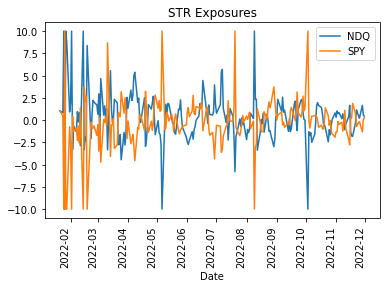

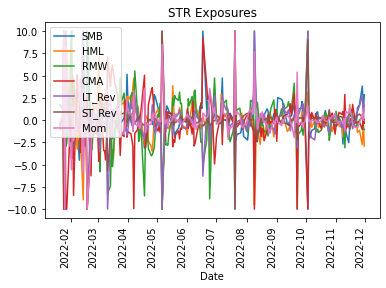

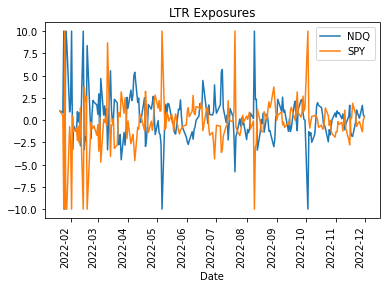

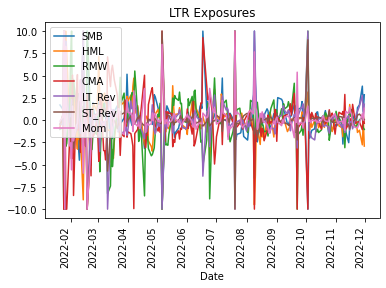

In [ ]:
## plot daily factor exposures
DailyFactorExposuresSTR.reset_index(inplace=True)
DailyFactorExposuresSTR.plot(x="Date", y=["NDQ", "SPY"], rot=90, title='STR Exposures')
DailyFactorExposuresSTR.plot(x="Date", y=["SMB", "HML", "RMW", "CMA", "LT_Rev", "ST_Rev", "Mom"], rot=90, title='STR Exposures')
DailyFactorExposuresLTR.reset_index(inplace=True)
DailyFactorExposuresLTR.plot(x="Date", y=["NDQ", "SPY"], rot=90, title='LTR Exposures')
DailyFactorExposuresLTR.plot(x="Date", y=["SMB", "HML", "RMW", "CMA", "LT_Rev", "ST_Rev", "Mom"], rot=90, title='LTR Exposures')

In [ ]:
## import SignalRets, format it, and merge with NDQ rets, SPY rets, and factor rets
SignalRets = pd.read_csv(filepath + "ss_SignalRets.csv")
SignalRets["Date"] = pd.to_datetime(SignalRets["Date"]).dt.date
SignalRets.set_index("Date", inplace=True)
SignalRets = SignalRets.join(NdqRets, how="left")
SignalRets = SignalRets.join(SpyRets, how="left")
SignalRets = SignalRets.join(Factors, how="left")
SignalRets.dropna(inplace=True)
print(SignalRets)


            ShortTermReversalRet  LongTermReversalRet       Avg    NdqRet  \
Date                                                                        
2022-01-21             -0.040402             0.000000 -0.020201 -0.027208   
2022-01-24              0.049426             0.000000  0.024713  0.006261   
2022-01-25             -0.015574             0.000000 -0.007787 -0.022796   
2022-01-26             -0.005420             0.000000 -0.002710  0.000209   
2022-01-27             -0.031898             0.000000 -0.015949 -0.013982   
...                          ...                  ...       ...       ...   
2022-11-23              0.018667             0.011517  0.015092  0.009925   
2022-11-25             -0.002980             0.009474  0.003247 -0.005224   
2022-11-28              0.007265             0.008888  0.008076 -0.015754   
2022-11-29              0.010712            -0.010423  0.000144 -0.005948   
2022-11-30              0.001059            -0.009611 -0.004276  0.044085   

In [ ]:
## compute beta of portfolio returns to each FF factor
STRregression = smf.ols(formula='ShortTermReversalRet ~ NdqRet + SpyRet + SMB + HML + RMW + CMA + LT_Rev + ST_Rev + Mom', data=SignalRets).fit()
LTRregression = smf.ols(formula='LongTermReversalRet ~ NdqRet + SpyRet + SMB + HML + RMW + CMA + LT_Rev + ST_Rev + Mom', data=SignalRets).fit()
print(STRregression.summary(), "\n\n")
print(LTRregression.summary(), "\n\n")

                             OLS Regression Results                             
Dep. Variable:     ShortTermReversalRet   R-squared:                       0.217
Model:                              OLS   Adj. R-squared:                  0.183
Method:                   Least Squares   F-statistic:                     6.372
Date:                  Wed, 25 Jan 2023   Prob (F-statistic):           5.73e-08
Time:                          04:20:29   Log-Likelihood:                 475.87
No. Observations:                   217   AIC:                            -931.7
Df Residuals:                       207   BIC:                            -897.9
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.002

In [ ]:
## export Signals for use later
Signals.to_csv(filepath + "ss_Signals.csv")

# HEDGING TECHNIQUES

In [ ]:
Signals=pd.read_csv(filepath + "ss_Signals.csv")

In [ ]:
Signals["Date"] = pd.to_datetime(Signals["Date"]).dt.date
Signals.set_index(["Date", "Ticker"], inplace=True)
print(Signals)

                   ShortTermReversal  LongTermReversal    Return       NDQ  \
Date       Ticker                                                            
2022-01-21 ACV              0.004453          0.000000 -0.090972 -1.469755   
           AFRM             0.005677          0.000000 -0.082325 -0.019184   
           AGQ             -0.007148          0.000000 -0.019664 -0.259836   
           ALGM             0.004296          0.000000 -0.014820  0.086363   
           ALSN            -0.002977          0.000000  0.002066 -0.024445   
...                              ...               ...       ...       ...   
2022-11-30 ZLAB             0.000000         -0.008692  0.144553  1.746923   
           ZM               0.009929          0.004142  0.068868  1.365206   
           ZS               0.000000          0.003155 -0.010382  2.022686   
           ZSL              0.000000          0.006015 -0.090193 -0.856677   
           ZTO             -0.006362         -0.004263  0.042412

# Now we orthogonalise our signals. Thus means to make them independent or uncorrelated with the FF factors. We do this by running an OLS Regression and extracting the residuals (as this is the part of our signal unexplained by FF factors)

In [ ]:
## orthogonalise signals to FF style factors - do NOT remove STR and LTR!  (it would kill our signal...)
Signals.reset_index(inplace=True)
Signals["ShortTermReversal-Hedged"] = Signals.groupby("Date").apply(lambda x: smf.ols(formula = "Q('ShortTermReversal') ~ Q('NDQ') + Q('SPY') + Q('SMB') + Q('HML') + Q('RMW') + Q('CMA')", data=x).fit().resid).reset_index().set_index("level_1")[[0]]
Signals["LongTermReversal-Hedged"] = Signals.groupby("Date").apply(lambda x: smf.ols(formula = "Q('LongTermReversal') ~ Q('NDQ') + Q('SPY') + Q('SMB') + Q('HML') + Q('RMW') + Q('CMA')", data=x).fit().resid).reset_index().set_index("level_1")[[0]]
print(Signals)


              Date Ticker  ShortTermReversal  LongTermReversal    Return  \
0       2022-01-21    ACV           0.004453          0.000000 -0.090972   
1       2022-01-21   AFRM           0.005677          0.000000 -0.082325   
2       2022-01-21    AGQ          -0.007148          0.000000 -0.019664   
3       2022-01-21   ALGM           0.004296          0.000000 -0.014820   
4       2022-01-21   ALSN          -0.002977          0.000000  0.002066   
...            ...    ...                ...               ...       ...   
139638  2022-11-30   ZLAB           0.000000         -0.008692  0.144553   
139639  2022-11-30     ZM           0.009929          0.004142  0.068868   
139640  2022-11-30     ZS           0.000000          0.003155 -0.010382   
139641  2022-11-30    ZSL           0.000000          0.006015 -0.090193   
139642  2022-11-30    ZTO          -0.006362         -0.004263  0.042412   

             NDQ       SPY       SMB       HML       RMW       CMA    LT_Rev  \
0      

In [ ]:
## normalise orthogonal weights
ShortTermReversalHedged = Signals.copy().groupby(["Date", "Ticker"])["ShortTermReversal-Hedged"].aggregate("first").unstack()
LongTermReversalHedged = Signals.copy().groupby(["Date", "Ticker"])["LongTermReversal-Hedged"].aggregate("first").unstack()
print(ShortTermReversalHedged)
print("\nShort-Term Reversal Hedged Long Weights Pre-Normalisation: \n", ShortTermReversalHedged[ShortTermReversalHedged > 0].sum(axis=1))
print("\nShort-Term Reversal Hedged Short Weights Pre-Normalisation: \n", ShortTermReversalHedged[ShortTermReversalHedged < 0].sum(axis=1))
print("\nShort-Term Reversal Hedged Net Exposures Pre-Normalisation: \n", ShortTermReversalHedged.sum(axis=1).round(2))
ShortTermReversalHedged = NormaliseWeightsForEachDate(ShortTermReversalHedged)  
LongTermReversalHedged = NormaliseWeightsForEachDate(LongTermReversalHedged)  
print("\nShort-Term Reversal Hedged Long Weights Normalised: \n", ShortTermReversalHedged[ShortTermReversalHedged > 0].sum(axis=1))
print("\nShort-Term Reversal Hedged Short Weights Normalised: \n", ShortTermReversalHedged[ShortTermReversalHedged < 0].sum(axis=1))
print("\nShort-Term Reversal Hedged Net Exposures Normalised: \n", ShortTermReversalHedged.sum(axis=1).round(2))

In [ ]:
## import raw SignalRets and format it
SignalRets = pd.read_csv(filepath + "ss_SignalRets.csv")
SignalRets["Date"] = pd.to_datetime(SignalRets["Date"]).dt.date
SignalRets.set_index("Date", inplace=True)
print(SignalRets)

## import daily stock returns and winsorise
DailyStockReturns = pd.read_csv(filepath+"DailyStockReturns2022.csv")
DailyStockReturns["Date"] = pd.to_datetime(DailyStockReturns["Date"]).dt.date
DailyStockReturns = DailyStockReturns.set_index(["Date", "Ticker"])
print("RAW RETURNS: \n")
print(DailyStockReturns)
print("\nMax Ret = ", DailyStockReturns.max().max())
print("\nMin Ret = ", DailyStockReturns.min().min())
DailyStockReturns = DailyStockReturns.where((DailyStockReturns["Return"] < 0.20), 0.20)
DailyStockReturns = DailyStockReturns.where((DailyStockReturns["Return"] > -0.20), -0.20)
print("\n\nWINSORISED RETURNS: \n")
print(DailyStockReturns)
print("\nMax Ret = ", DailyStockReturns.max().max())
print("\nMin Ret = ", DailyStockReturns.min().min())

In [ ]:
## create stock returns matrix
DailyStockReturnsMatrix = DailyStockReturns.copy().groupby(["Date", "Ticker"])["Return"].aggregate("first").unstack()
DailyStockReturnsMatrix.sort_values(by="Date", ascending=True, inplace=True)
print(DailyStockReturnsMatrix)

In [ ]:
## compute daily returns for each hedged signal and merge onto SignalRets
ShortTermReversalRetsHedged = pd.DataFrame(ShortTermReversalHedged.mul(DailyStockReturnsMatrix).sum(axis=1), columns=["ShortTermReversalHedgedRet"])
LongTermReversalRetsHedged = pd.DataFrame(LongTermReversalHedged.mul(DailyStockReturnsMatrix).sum(axis=1), columns=["LongTermReversalHedgedRet"])
SignalRets = SignalRets.join(ShortTermReversalRetsHedged, how='outer')
SignalRets = SignalRets.join(LongTermReversalRetsHedged, how='outer')
print("\nDaily Signal Returns: \n", SignalRets)


Daily Signal Returns: 
             ShortTermReversalRet  LongTermReversalRet       Avg  \
Date                                                              
2022-01-03              0.000000             0.000000  0.000000   
2022-01-04              0.000000             0.000000  0.000000   
2022-01-05              0.000000             0.000000  0.000000   
2022-01-06              0.000000             0.000000  0.000000   
2022-01-07              0.000000             0.000000  0.000000   
...                          ...                  ...       ...   
2022-12-21              0.028723             0.007542  0.018132   
2022-12-22             -0.027223            -0.017042 -0.022132   
2022-12-23             -0.003873             0.013704  0.004915   
2022-12-27             -0.021147            -0.014903 -0.018025   
2022-12-28              0.012752             0.000531  0.006642   

            ShortTermReversalHedgedRet  LongTermReversalHedgedRet  
Date                               

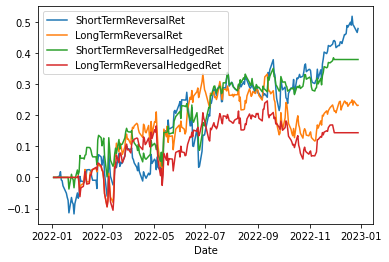

In [ ]:
## plot the signals and examine results
CumSignalRets = np.cumsum(SignalRets).reset_index()
CumSignalRets.plot(x="Date", y=["ShortTermReversalRet", "LongTermReversalRet", "ShortTermReversalHedgedRet", "LongTermReversalHedgedRet"])
